# A3 - Correlation and linear regression
Probability and Statistics<br>
Name(s): Hanh Hoang, Roni Nuutinen<br>
Date: 29 November 2023<br>
[Helsinki Metropolia University of Applied Sciences](https://www.metropolia.fi/en)
  

## Introduction

The following problems uses data and idea from **[OpenIntro Statistics](https://www.openintro.org/book/os/)**. The original Notebook **[Introduction to linear regression](https://github.com/akmand/stats_tutorials/blob/main/ch8_simple_regression.ipynb)** explains the background. More detailed explanation of the variables and their analysis can be read from **[Baseball statistics](https://en.wikipedia.org/wiki/Baseball_statistics)** and **[Sabermetrics](https://en.wikipedia.org/wiki/Sabermetrics)**-

This assignment follows the original material's **[Creative Commons Attribution-ShareAlike 3.0 Unported](https://creativecommons.org/licenses/by-sa/3.0/)** license policy. The data file can be found from OMA.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import linregress

# Read data
data = pd.read_csv("mlbbat10.csv")
data.head()

,name,team,position,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg
0,I Suzuki,SEA,OF,162,680,74,214,30,3,6,43,268,45,86,42,9,0.359,0.394,0.315
1,D Jeter,NYY,SS,157,663,111,179,30,3,10,67,245,63,106,18,5,0.340,0.370,0.270
2,M Young,TEX,3B,157,656,99,186,36,3,21,91,291,50,115,4,2,0.330,0.444,0.284
3,J Pierre,CWS,OF,160,651,96,179,18,3,1,47,206,45,47,68,18,0.341,0.316,0.275
4,R Weeks,MIL,2B,160,651,112,175,32,4,29,83,302,76,184,11,4,0.366,0.464,0.269


## Problem 1.

Coding:
- Calculate the descriptive statistics for the whole dataset.
- Plot the histograms of the variables `run` and `at_bat`.
- Plot the scatterplot between `run`and `at_bat`. Use `at_bat` as [independent](https://en.wikipedia.org/wiki/Regression_analysis) and `run` as [dependent variable](https://en.wikipedia.org/wiki/Dependent_and_independent_variables).

Questions:

a) Describe in your own words the statistics for **<a href="https://en.wikipedia.org/wiki/Run_(baseball)">run</a>** and **[at_bat](https://en.wikipedia.org/wiki/At_bat)** variables.<br>
b) Describe *by words* (interpret the scatterplot) how does the relationship between `at_bat` and `run` look like.<br>
c) If you knew in advance a player's time `at_bat`, would you be comfortable to predict the `run` score? Explain why.

In [2]:
# Your code
data.describe()

,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000,1199.000000
mean,50.534612,137.909091,17.771476,35.491243,7.077565,0.722269,3.847373,16.920767,55.555463,13.159299,28.612177,2.46789,0.941618,0.205531,0.237613,0.159374
std,49.544371,188.126913,27.051262,51.908498,10.812941,1.601990,7.372345,26.636637,83.717936,20.737459,38.441364,6.48013,2.161646,0.173192,0.236077,0.144587
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,37.000000,3.000000,6.000000,1.000000,0.000000,0.000000,2.000000,8.000000,2.000000,10.000000,0.00000,0.000000,0.255000,0.273000,0.195000
75%,84.000000,225.000000,26.500000,56.000000,11.000000,1.000000,4.000000,25.000000,82.500000,20.000000,44.000000,1.00000,1.000000,0.324000,0.394000,0.259000
max,162.000000,680.000000,115.000000,214.000000,49.000000,14.000000,54.000000,126.000000,351.000000,114.000000,211.000000,68.00000,18.000000,1.000000,4.000000,1.000000


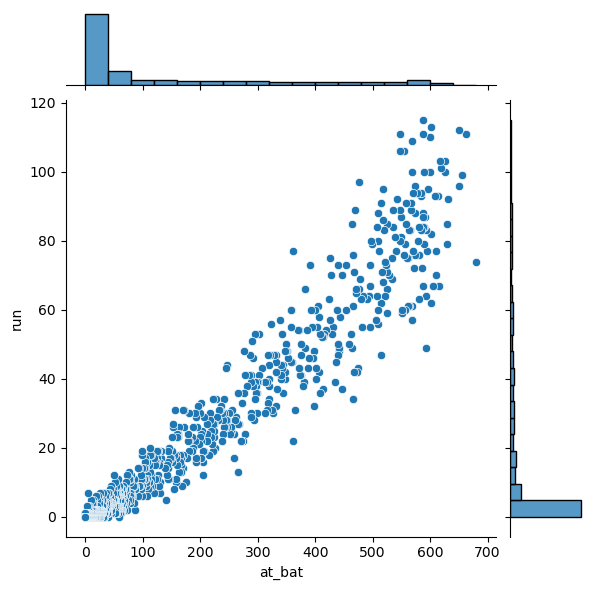

In [3]:
x = data['at_bat']
y = data['run']
sns.jointplot(data = data, x = 'at_bat', y = 'run')
plt.show()

**Answers:** <br>
a) Describe in your own words the statistics for run and at_bat variables. <br>
b) Describe by words (interpret the scatterplot) how does the relationship between at_bat and run look like. <br>
c) If you knew in advance a player's time at_bat, would you be comfortable to predict the run score? Explain why. <br>

a) The statistic shows that the most common 'run' variable is in range of 0 - 5. Most common value of at_bat variable is in range of 0-40 <br>
b) There’s an apparent correlation between the two. It's linear correlation. The more they have experience, the better they appear to be at running. <br>
c) The higher at_bat times the players have, the less precisely the run score gets to predict. However we could still guess based on the graph. 
The lower at_bat players get, the shorter run score players got and the prediction is more precise with lower at_bat values. Since the scatter plot shows linear correlation, the prediction can still be done but the prediction precision is lower with higher at_bat variable where plot is scattered wider with bigger range

## Problem 2.

Coding:
- Calculate the correlation coefficient between the `run` and `at_bat`.
- Using any method, like `numpy.polyfit()` or `scipy.stats.linregress()`, find the best regression line that fits to the data.
- Plot the scatterplot between variables `at_bat` and `run`.
- Add the best fitting regression line to the graph.
- Add the results of the correlation calculation either into the title of the graph or legend box.
- Decorate the graph with suitable labels, grid-lines.
- Use different colors for the scatter-plot and the regression line.

Questions:

a) How the `at_bat` and `run` are correlated? Interpret the results of correlation calculations.<br>
b) If the player is `at_bat` 400 times in a year, what is his `run` score?<br>
c) How certain you would be about that score? Explain why.<br>

In [4]:
# Your code
variables = ['run', 'at_bat']
data[variables].corr()

,run,at_bat
run,1.000000,0.970168
at_bat,0.970168,1.000000


In [5]:
x = data['at_bat']
y = data['run']
r = linregress(x,y)
print(r)

LinregressResult(slope=0.13950301579813856, intercept=-1.4672578576060111, rvalue=0.9701681133028665, pvalue=0.0, stderr=0.0010075846161096294, intercept_stderr=0.2349663455273495)


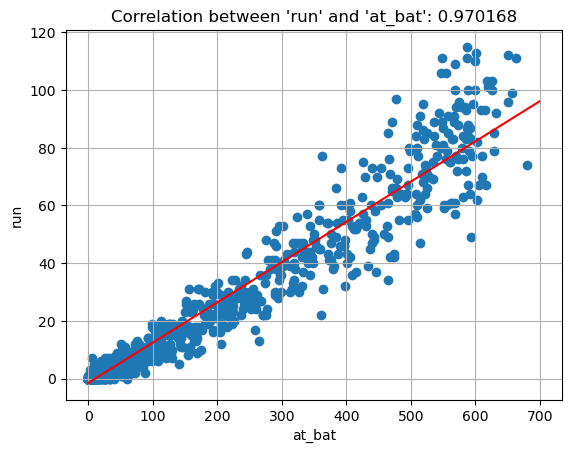

In [6]:
x2 = np.arange(0, 700)
y2 = r.slope * x2 + r.intercept
plt.scatter(x,y)
plt.plot(x2, y2, color= 'red')
plt.title(f"Correlation between 'run' and 'at_bat': 0.970168")
plt.xlabel('at_bat')
plt.ylabel('run')
plt.grid()
plt.show()

**Answers:**
Questions: <br>

a) How the at_bat and run are correlated? Interpret the results of correlation calculations. <br>
b) If the player is at_bat 400 times in a year, what is his run score? <br>
c) How certain you would be about that score? Explain why. <br>

a)  There's linear correlation between the two variables. <br>
    The more they have experience with higher at_bat, the higher run score they got.<br>
b)  Run score is between 35 and 60<br>
c)  With at_bar 400 times, the prediction of run score is hardly precise. We can only predict that the run score is around a range of between 35 to 60. (the higher at_bat times, the less precise that we can get with prediction) <br>

## Problem 3.

Study the other variables in the dataset. Find the variable that could best predict the `run` score. Explain which one of the variables you would select and why.

In [10]:
data_numbers = ["game", "at_bat", "run", "hit", "double", "triple", "home_run", "rbi", "total_base", "walk", "strike_out", "stolen_base", "caught_stealing", "obp", "slg", "bat_avg"]
data[data_numbers].corr()


,game,at_bat,run,hit,double,triple,home_run,rbi,total_base,walk,strike_out,stolen_base,caught_stealing,obp,slg,bat_avg
game,1.000000,0.938213,0.903774,0.924026,0.890881,0.625684,0.765198,0.880960,0.914098,0.858526,0.879365,0.561894,0.629483,0.473870,0.484002,0.463894
at_bat,0.938213,1.000000,0.970168,0.991519,0.954346,0.662491,0.816416,0.939538,0.979084,0.906541,0.921892,0.614504,0.678982,0.502603,0.513554,0.497166
run,0.903774,0.970168,1.000000,0.977381,0.949386,0.684214,0.859812,0.945531,0.981973,0.925169,0.907874,0.642059,0.684150,0.486126,0.507882,0.476034
hit,0.924026,0.991519,0.977381,1.000000,0.964365,0.665552,0.822227,0.945025,0.987289,0.900749,0.897921,0.617696,0.681796,0.498144,0.513439,0.497997
double,0.890881,0.954346,0.949386,0.964365,1.000000,0.608029,0.836845,0.941710,0.971456,0.890788,0.882539,0.530795,0.592942,0.482109,0.511973,0.477903
triple,0.625684,0.662491,0.684214,0.665552,0.608029,1.000000,0.448599,0.570545,0.647986,0.578608,0.627790,0.657320,0.627817,0.327566,0.339161,0.330783
home_run,0.765198,0.816416,0.859812,0.822227,0.836845,0.448599,1.000000,0.935789,0.899254,0.839335,0.846167,0.353880,0.424963,0.401872,0.478250,0.385235
rbi,0.880960,0.939538,0.945531,0.945025,0.941710,0.570545,0.935789,1.000000,0.976641,0.902460,0.900195,0.482686,0.555663,0.470728,0.514873,0.461227
total_base,0.914098,0.979084,0.981973,0.987289,0.971456,0.647986,0.899254,0.976641,1.000000,0.917438,0.918306,0.570200,0.635621,0.489843,0.523806,0.484936
walk,0.858526,0.906541,0.925169,0.900749,0.890788,0.578608,0.839335,0.902460,0.917438,1.000000,0.891127,0.546750,0.585391,0.486626,0.482184,0.443362


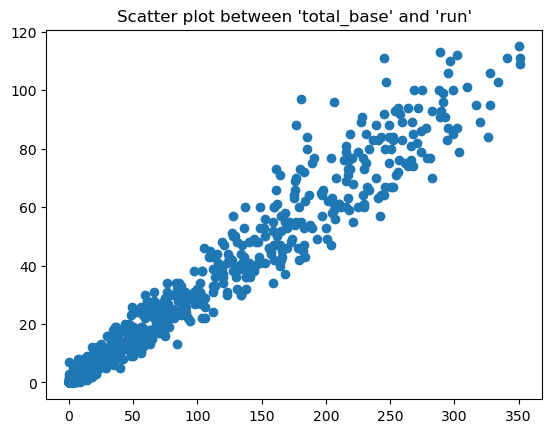

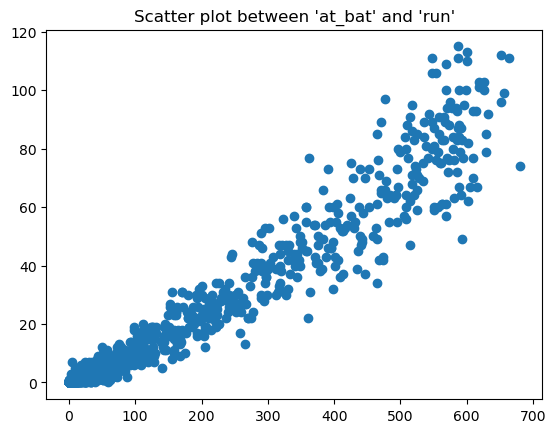

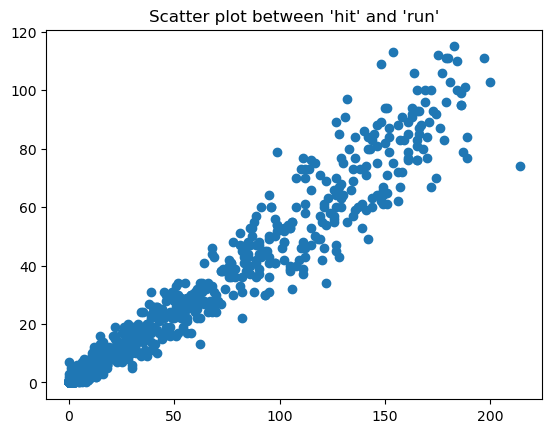

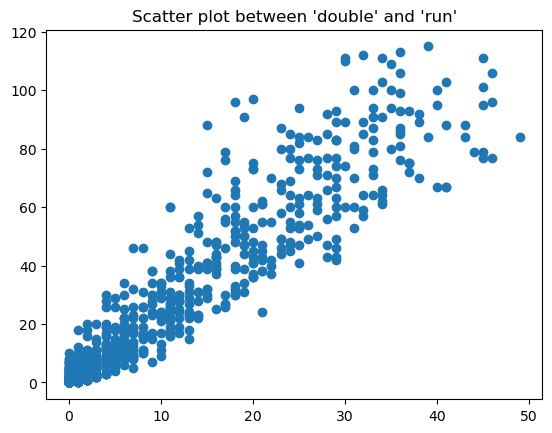

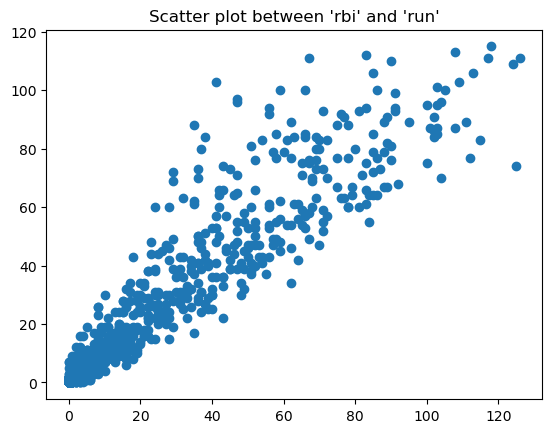

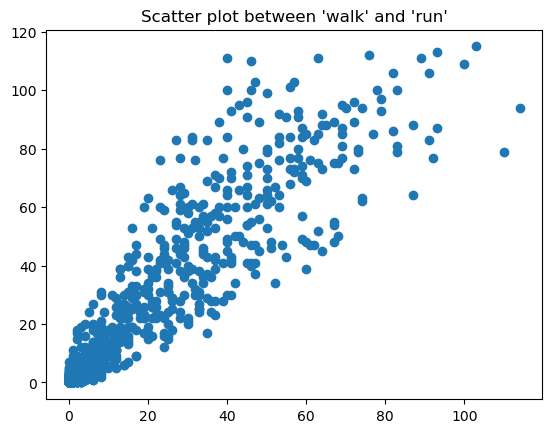

In [9]:
plt.scatter(data["total_base"], data["run"])
plt.title("Scatter plot between 'total_base' and 'run'")
plt.show()
plt.scatter(data["at_bat"], data["run"])
plt.title("Scatter plot between 'at_bat' and 'run'")
plt.show()
plt.scatter(data["hit"], data["run"])
plt.title("Scatter plot between 'hit' and 'run'")
plt.show()
plt.scatter(data["double"], data["run"])
plt.title("Scatter plot between 'double' and 'run'")
plt.show()
plt.scatter(data["rbi"], data["run"])
plt.title("Scatter plot between 'rbi' and 'run'")
plt.show()
plt.scatter(data["walk"], data["run"])
plt.title("Scatter plot between 'walk' and 'run'")
plt.show()

**Answer:**
total_base has the highest correlation with run variable out of this dataset with correlation value is 0.981973
Scatterplots between runs and the few highest correlations (over 0.9) support this conclusion.

